In [2]:
import pandas as pd
import numpy as np
import streamlit as st

In [6]:
basic_data_old = pd.read_csv("./data/2020-08-19.csv")

In [8]:
basic_data_old.columns

Index(['Unnamed: 0', 'ID', 'Name', 'Year', 'Rank', 'Average', 'Bayes average',
       'Users rated', 'URL', 'Thumbnail'],
      dtype='object')

In [11]:
basic_data_old = basic_data_old.drop(['Unnamed: 0'], axis=1)

In [22]:
basic_data_old[basic_data_old['Year']>2022]

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
187,188,Go,2200,162,7.63,7.330,14296,/boardgame/188/go,https://cf.geekdo-images.com/micro/img/ncEmbZZ...
266,2397,Backgammon,3000,1238,6.54,6.365,11209,/boardgame/2397/backgammon,https://cf.geekdo-images.com/micro/img/bWZaJZy...
3408,2399,Senet,3500,7716,5.85,5.580,633,/boardgame/2399/senet,https://cf.geekdo-images.com/micro/img/RMaALim...
4019,1602,The Royal Game of Ur,2600,11666,5.79,5.531,498,/boardgame/1602/royal-game-ur,https://cf.geekdo-images.com/micro/img/zVHynFA...
4363,5546,Marbles,3000,19207,4.69,5.310,440,/boardgame/5546/marbles,https://cf.geekdo-images.com/micro/img/15uQaqV...


In [18]:
basic_data_old[(basic_data_old['Average']>=0) & (basic_data_old['Average']<=10)]

,ID,Name,Year,Rank,Average,Bayes average,Users rated,URL,Thumbnail
0,30549,Pandemic,2008,91,7.62,7.518,96186,/boardgame/30549/pandemic,https://cf.geekdo-images.com/micro/img/0m3-oqB...
1,822,Carcassonne,2000,173,7.42,7.311,96181,/boardgame/822/carcassonne,https://cf.geekdo-images.com/micro/img/z0tTaij...
2,13,Catan,1995,381,7.16,7.001,96171,/boardgame/13/catan,https://cf.geekdo-images.com/micro/img/e0y6Bog...
3,68448,7 Wonders,2010,50,7.76,7.662,79830,/boardgame/68448/7-wonders,https://cf.geekdo-images.com/micro/img/h-Ejv31...
4,36218,Dominion,2008,88,7.63,7.521,74933,/boardgame/36218/dominion,https://cf.geekdo-images.com/micro/img/VYp2s2f...
...,...,...,...,...,...,...,...,...,...
19325,246345,Ninja Rush,2018,16924,5.08,5.490,30,/boardgame/246345/ninja-rush,https://cf.geekdo-images.com/micro/img/eCp8Pcd...
19326,195623,Politricks: Dirty Card Game,2016,13932,6.72,5.515,30,/boardgame/195623/politricks-dirty-card-game,https://cf.geekdo-images.com/micro/img/ZelpOfR...
19327,235943,Doppel X,2017,16639,5.17,5.493,30,/boardgame/235943/doppel-x,https://cf.geekdo-images.com/micro/img/qHru7Fq...
19328,284862,Beasty Borders,2019,13933,6.20,5.515,30,/boardgame/284862/beasty-borders,https://cf.geekdo-images.com/micro/img/Hh4I7CE...


In [1]:
import csv

In [ ]:
a = 1

In [1]:
from fuzzywuzzy import process

/home/sungbae/.local/share/virtualenvs/boardgame_recommendation_system-f-GT0dhu/lib/python3.9/site-packages/fuzzywuzzy/fuzz.py:11: UserWarning: Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning
  warnings.warn('Using slow pure-python SequenceMatcher. Install python-Levenshtein to remove this warning')


In [2]:
input_string = 'game'
name_list = ['game', 'name', 'id', 'list']

In [3]:
results = process.extract(input_string, name_list, limit = 5)

In [8]:
results[0]

('game', 100)

In [10]:
type(results[0][0])

str

In [11]:
for name, score in results:
    print('name:',name)

name: game
name: name
name: id
name: list


In [25]:
import pandas as pd

df = pd.DataFrame({'id':[100,200,300,400], 'name':name_list})

In [29]:
df

,id,name
0,100,game
1,200,name
2,300,id
3,400,list


In [57]:
df[df['id']<300].to_dict(orient='records')

[{'id': 100, 'name': 'game'}, {'id': 200, 'name': 'name'}]

In [58]:
test = []
for i in df[df['id']<300].to_dict(orient='records'):
    test.append(i['id'])

In [59]:
test

[100, 200]

In [16]:
dic = {'df':'a', '2':'b'}


In [18]:
list(dic.keys())

['1', '2']

In [60]:
import requests

In [65]:
top100_id_list = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id=30549')

In [66]:
type(top100_id_list.json())

dict

In [78]:
from pyarrow import csv

In [130]:
detailed_data = csv.read_csv('./data/games_detailed_info.csv').to_pandas()
basic_data_new = csv.read_csv('./data/2022-01-08.csv').to_pandas()

In [200]:
def rank_to_int(x):
    if x.isdigit():
        return int(x)
    else:
        return 1000000

In [217]:
print(detailed_data['image'][detailed_data['Board Game Rank'].apply(rank_to_int)<=5])

7      https://cf.geekdo-images.com/wg9oOLcsKvDesSUdZ...
26     https://cf.geekdo-images.com/sZYp_3BTDGjh2unaZ...
28     https://cf.geekdo-images.com/-Qer2BBPG7qGGDu6K...
98     https://cf.geekdo-images.com/x3zxjr-Vw5iU4yDPg...
199    https://cf.geekdo-images.com/_Ppn5lssO5OaildSE...
Name: image, dtype: object


In [184]:
reivew_data = csv.read_csv('./data/bgg-19m-reviews.csv').to_pandas()

In [190]:
dd = requests.get('http://127.0.0.1:5000/api?data-source=review-data-new&game-id='+str(30549)+'&content=comment')

In [209]:
requests.get('http://127.0.0.1:5000/api?data-source=basic-data-new?game-id='+str(30549)+'&content=Name').text

'<!doctype html>\n<html lang=en>\n<title>500 Internal Server Error</title>\n<h1>Internal Server Error</h1>\n<p>The server encountered an internal error and was unable to complete your request. Either the server is overloaded or there is an error in the application.</p>\n'

In [95]:
result_dict = requests.get('http://127.0.0.1:5000/name_id_dict?mode=name-id').json()

In [101]:
pd.DataFrame({'id':list(result_dict.keys()), 'name':list(result_dict.values())})

,id,name
0,"""La Garde recule!""",[122711]
1,"""Oh My God! There's An Axe In My Head."" The Ga...",[23304]
2,"""Scratch One Flat Top!""",[4016]
3,"""Tarleton's Quarter!""",[38836]
4,#MyLife,[286535]
...,...,...
21427,曼荼羅 (Mandara),[189218]
21428,猿道 (Monkey Road),[177572]
21429,白と黒でトリテ (Trick-Taking in Black and White),[335467]
21430,目撃者たちの夜 (Witness Night),[308238]


In [223]:
img_url = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(30549)+'&content=image').text

In [218]:
response = requests.get('https://cf.geekdo-images.com/S3ybV1LAp-8SnHIXLLjVqA__micro/img/S4tXI3Yo7BtqmBoKINLLVUFsaJ0=/fit-in/64x64/filters:strip_icc()/pic1534148.jpg')

In [220]:
image = Image.open(BytesIO(response.content))

In [221]:
new_image = image.resize((600,400))

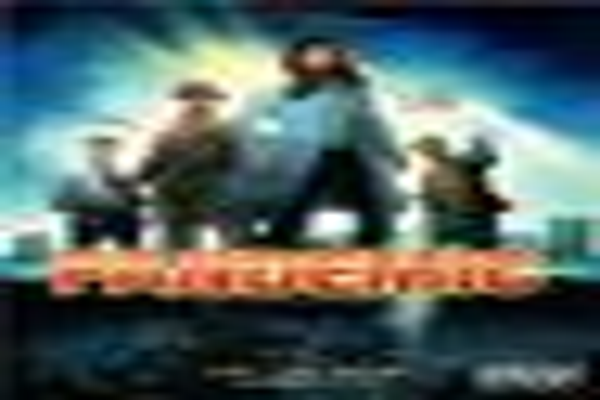

In [222]:
new_image

In [107]:
from PIL import Image
from io import BytesIO

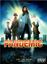

In [108]:
Image.open(BytesIO(response.content))

In [112]:
name_id_dict = requests.get('http://127.0.0.1:5000/name_id_dict?mode=name-id').json()

In [113]:
name_list = list(name_id_dict.keys())

In [193]:
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all').json()
result_dict = dict()
for id in id_list:
    review_data = requests.get('http://127.0.0.1:5000/api?data-source=review-data-new&game-id='+str(id)+'&content=comment').json()
    result_dict[id] = review_data


In [197]:
len(result_dict)

21631

In [174]:
import warnings
warnings.filterwarnings('ignore')

In [175]:
input_df = pd.DataFrame()
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all')
id_list = id_list.json()
for id in id_list:
    detailed_game_data = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(id)).json()
    input_df = input_df.append(detailed_game_data, ignore_index=True)
input_df = input_df[['primary','minplayers','maxplayers','playingtime','minage','boardgamecategory',
                     'boardgamemechanic','boardgamefamily','bayesaverage','Board Game Rank','averageweight']]


In [177]:
input_df

,primary,minplayers,maxplayers,playingtime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,bayesaverage,Board Game Rank,averageweight
0,Pandemic,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",7.48669,106,2.4063
1,Carcassonne,2,5,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",7.30857,191,1.9057
2,Catan,3,4,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",6.96965,429,2.3130
3,7 Wonders,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",7.63355,73,2.3264
4,Dominion,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",7.49912,104,2.3542
...,...,...,...,...,...,...,...,...,...,...,...
21626,Sacred Rites,3,9,30,8,"['Bluffing', 'Deduction', 'Humor', 'Party Game...","['Acting', 'Roles with Asymmetric Information'...",,5.53114,12750,2.0000
21627,BABEL,1,5,30,10,"['Action / Dexterity', 'Bluffing', 'Card Game'...","['Cooperative Game', 'Hand Management']","['Ancient: Babylon', 'Ancient: Mesopotamia']",5.51748,15017,0.0000
21628,Goldrush,2,4,60,10,"['American West', 'Dice', 'Exploration', 'Figh...","['Dice Rolling', 'Memory', 'Pick-up and Delive...",['States: Arizona'],5.48821,19461,1.3333
21629,Bongo Kongo,2,4,10,5,"['Action / Dexterity', 'Animals', ""Children's ...",,"['Animals: Apes / Monkeys', 'Components: Marbl...",5.50484,17262,1.2857


In [181]:
# input_df = pd.DataFrame()
id_list = requests.get('http://127.0.0.1:5000/game_list?mode=all')
id_list = id_list.json()
row_list = []
for id in id_list:
    detailed_game_data = requests.get('http://127.0.0.1:5000/api?data-source=detailed-data&game-id='+str(id)).json()
    row_list.append(detailed_game_data)
input_df = pd.DataFrame(row_list)
input_df = input_df[['primary','minplayers','maxplayers','playingtime','minage','boardgamecategory',
                     'boardgamemechanic','boardgamefamily','bayesaverage','Board Game Rank','averageweight']]


In [183]:
input_df

,primary,minplayers,maxplayers,playingtime,minage,boardgamecategory,boardgamemechanic,boardgamefamily,bayesaverage,Board Game Rank,averageweight
0,Pandemic,2,4,45,8,['Medical'],"['Action Points', 'Cooperative Game', 'Hand Ma...","['Components: Map (Global Scale)', 'Components...",7.48669,106,2.4063
1,Carcassonne,2,5,45,7,"['City Building', 'Medieval', 'Territory Build...","['Area Majority / Influence', 'Map Addition', ...","['Cities: Carcassonne (France)', 'Components: ...",7.30857,191,1.9057
2,Catan,3,4,120,10,"['Economic', 'Negotiation']","['Dice Rolling', 'Hexagon Grid', 'Income', 'Mo...","['Animals: Sheep', 'Components: Hexagonal Tile...",6.96965,429,2.3130
3,7 Wonders,2,7,30,10,"['Ancient', 'Card Game', 'City Building', 'Civ...","['Drafting', 'Hand Management', 'Set Collectio...","['Ancient: Babylon', 'Ancient: Egypt', 'Ancien...",7.63355,73,2.3264
4,Dominion,2,4,30,13,"['Card Game', 'Medieval']","['Deck, Bag, and Pool Building', 'Delayed Purc...","['Crowdfunding: Wspieram', 'Game: Dominion', '...",7.49912,104,2.3542
...,...,...,...,...,...,...,...,...,...,...,...
21626,Sacred Rites,3,9,30,8,"['Bluffing', 'Deduction', 'Humor', 'Party Game...","['Acting', 'Roles with Asymmetric Information'...",,5.53114,12750,2.0000
21627,BABEL,1,5,30,10,"['Action / Dexterity', 'Bluffing', 'Card Game'...","['Cooperative Game', 'Hand Management']","['Ancient: Babylon', 'Ancient: Mesopotamia']",5.51748,15017,0.0000
21628,Goldrush,2,4,60,10,"['American West', 'Dice', 'Exploration', 'Figh...","['Dice Rolling', 'Memory', 'Pick-up and Delive...",['States: Arizona'],5.48821,19461,1.3333
21629,Bongo Kongo,2,4,10,5,"['Action / Dexterity', 'Animals', ""Children's ...",,"['Animals: Apes / Monkeys', 'Components: Marbl...",5.50484,17262,1.2857
